<a href="https://colab.research.google.com/github/MrSimple07/PhD_TUS/blob/main/openRAN_sample_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json

# --- 1. Define a hypothetical Open RAN Component API Endpoint ---
# In a real Open RAN, this would be the URL of a specific network function (e.g., vCU, vDU, RIC)
# or an orchestrator that exposes control/monitoring APIs.
api_base_url = "https://api.example.com/openran/v1"

# --- 2. Simulate a function to update a network configuration parameter ---
# Imagine we want to change a parameter for a virtualized base station (gNB)
# For this example, we'll just print what *would* be sent.
def update_gnb_config(gnb_id, parameter, value):
    endpoint = f"{api_base_url}/gnbs/{gnb_id}/config"
    payload = {
        "parameter": parameter,
        "value": value,
        "action": "update"
    }
    print(f"\nSimulating API call to: {endpoint}")
    print(f"With payload: {json.dumps(payload, indent=2)}")

    # In a real scenario, you'd use requests.post or requests.put:
    # try:
    #     response = requests.put(endpoint, json=payload, timeout=5)
    #     response.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
    #     print("API Call Successful!")
    #     print(f"Response: {response.json()}")
    # except requests.exceptions.RequestException as e:
    #     print(f"API Call Failed: {e}")


# --- 3. Simulate a function to get monitoring data ---
# An example of fetching performance metrics from a network slice.
def get_slice_metrics(slice_id):
    endpoint = f"{api_base_url}/slices/{slice_id}/metrics"
    print(f"\nSimulating API call to: {endpoint}")

    # In a real scenario, you'd use requests.get:
    # try:
    #     response = requests.get(endpoint, timeout=5)
    #     response.raise_for_status()
    #     metrics = response.json()
    #     print("API Call Successful!")
    #     print(f"Metrics for slice {slice_id}: {json.dumps(metrics, indent=2)}")
    # except requests.exceptions.RequestException as e:
    #     print(f"API Call Failed: {e}")


# --- Example Usage ---
print("--- Simulating Open RAN API Interactions ---")

# Update a gNB's power setting
update_gnb_config(gnb_id="gNB-123", parameter="tx_power_dbm", value=20)

# Get metrics for a specific network slice
get_slice_metrics(slice_id="enterprise_slice_001")

print("\n(Note: This is a simulation. No actual API calls are made.)")

--- Simulating Open RAN API Interactions ---

Simulating API call to: https://api.example.com/openran/v1/gnbs/gNB-123/config
With payload: {
  "parameter": "tx_power_dbm",
  "value": 20,
  "action": "update"
}

Simulating API call to: https://api.example.com/openran/v1/slices/enterprise_slice_001/metrics

(Note: This is a simulation. No actual API calls are made.)


### Explanation of the Code and its Relevance to Open RAN:

This simple Python script demonstrates how you might conceptually interact with a 5G Open RAN system through its Application Programming Interfaces (APIs).

1.  **`api_base_url`**: Represents the base URL for a hypothetical Open RAN controller or a specific network function (e.g., a virtualized Central Unit - vCU, or a RAN Intelligent Controller - RIC). In a real Open RAN deployment, each component would expose its own set of APIs.

2.  **`update_gnb_config(gnb_id, parameter, value)` function**: This function simulates an orchestrator or an application sending a command to update a configuration parameter on a virtualized gNB (base station). For instance, an application might dynamically adjust the transmit power of a gNB based on traffic conditions or energy efficiency policies. The `payload` is formatted as JSON, a standard data exchange format for web APIs.

3.  **`get_slice_metrics(slice_id)` function**: This function simulates an application requesting real-time performance metrics for a specific network slice. In Open RAN, network slicing allows dedicating resources for different services (e.g., IoT, enhanced mobile broadband, ultra-reliable low latency communication). Monitoring these slices via APIs is crucial for network management and optimization.

**Key Takeaways for Coding in Open RAN:**

*   **API-driven interaction:** Most control, configuration, and monitoring in Open RAN happen through well-defined APIs (often RESTful APIs).
*   **Orchestration and Automation:** Python, with libraries like `requests`, is commonly used to write scripts and applications that automate the deployment, configuration, and management of Open RAN components by interacting with these APIs.
*   **JSON Data Exchange:** Data between components and controllers is frequently exchanged using JSON format.
*   **Cloud-Native Principles:** While not directly shown, these API interactions are often orchestrated within cloud-native environments using tools like Kubernetes.

This example provides a basic understanding of the *mechanics* of how software interacts with network components in an Open RAN environment, rather than the intricate details of the network functions themselves.

### Applying Machine Learning for Anomaly Detection in Open RAN (Simulated Example)

This example demonstrates how a simple Machine Learning technique (Z-score for anomaly detection) could be applied to simulated Open RAN data. In a real Open RAN environment, data would be collected from various network functions (e.g., vCU, vDU, RIC) via APIs, and ML models would be used to find patterns, predict issues, or optimize performance.

/tmp/ipython-input-2201304556.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start='2023-01-01', periods=len(simulated_data), freq='H')


--- Simulated vCU CPU Utilization Data ---
2023-01-01 00:00:00    51.808180
2023-01-01 01:00:00    50.984306
2023-01-01 02:00:00    57.389470
2023-01-01 03:00:00    53.692333
2023-01-01 04:00:00    51.209811
Freq: h, Name: vCU_CPU_Utilization, dtype: float64
2023-01-04 18:00:00    47.351199
2023-01-04 19:00:00    90.000000
2023-01-04 20:00:00    36.901274
2023-01-04 21:00:00    49.071705
2023-01-04 22:00:00    48.541531
Freq: h, Name: vCU_CPU_Utilization, dtype: float64

--- Detected Anomalies (Z-score > 2.5) ---
2023-01-01 05:00:00    92.0
2023-01-03 04:00:00    85.0
2023-01-03 14:00:00    88.0
2023-01-04 17:00:00    15.0
2023-01-04 19:00:00    90.0
Name: vCU_CPU_Utilization, dtype: float64


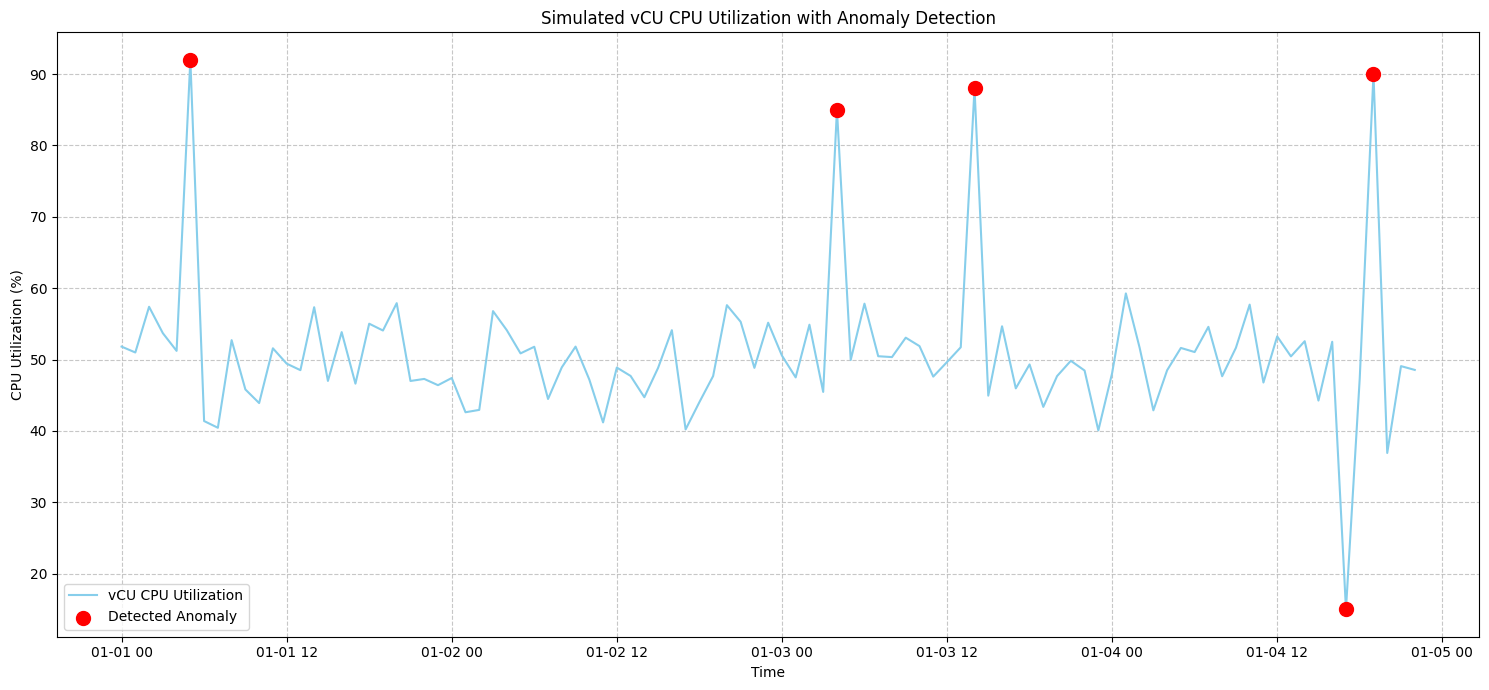

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# --- 1. Simulate Open RAN Metric Data ---
# Let's imagine we are monitoring the CPU utilization (%) of a virtualized Central Unit (vCU).
# We'll simulate 100 data points over time with some normal fluctuations and a few anomalies.
np.random.seed(42)

# Normal operating CPU utilization
normal_cpu_util = np.random.normal(loc=50, scale=5, size=90) # Mean 50%, std dev 5%

# Introduce some anomalous high CPU utilization points
anomalies = np.array([85, 90, 88, 15, 92]) # High spikes and one low dip

# Combine and shuffle to make it look like a time series
simulated_data = np.concatenate((normal_cpu_util, anomalies))
np.random.shuffle(simulated_data)

# Create a pandas Series with a time index
time_index = pd.date_range(start='2023-01-01', periods=len(simulated_data), freq='h') # Changed 'H' to 'h'
cpu_utilization = pd.Series(simulated_data, index=time_index, name='vCU_CPU_Utilization')

print("--- Simulated vCU CPU Utilization Data ---")
print(cpu_utilization.head())
print(cpu_utilization.tail())

# --- 2. Apply a Simple Anomaly Detection Model (Z-score) ---
# Z-score measures how many standard deviations an element is from the mean.
# A high absolute Z-score indicates an anomaly.

z_scores = np.abs(zscore(cpu_utilization))

# Define a threshold for anomaly detection (e.g., 2 or 3 standard deviations)
threshold = 2.5
anomalies_detected = cpu_utilization[z_scores > threshold]

print(f"\n--- Detected Anomalies (Z-score > {threshold}) ---")
print(anomalies_detected)

# --- 3. Visualize the Data and Anomalies ---
plt.figure(figsize=(15, 7))
plt.plot(cpu_utilization.index, cpu_utilization.values, label='vCU CPU Utilization', color='skyblue')
plt.scatter(anomalies_detected.index, anomalies_detected.values, color='red', s=100, label='Detected Anomaly', zorder=5)

plt.title('Simulated vCU CPU Utilization with Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('CPU Utilization (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Explanation of the ML Code for Open RAN:

1.  **Simulated Data (`cpu_utilization`):** We create a time series representing CPU utilization. This data mimics metrics that would be collected from a virtualized component (like a vCU) within an Open RAN setup. Real data would come from monitoring APIs of these components.

2.  **Anomaly Detection (`z_scores`, `threshold`):**
    *   We calculate the Z-score for each data point. The Z-score tells us how many standard deviations away from the mean a particular observation is. `scipy.stats.zscore` is used for this.
    *   A `threshold` (e.g., 2.5) is set. Any data point with an absolute Z-score above this threshold is considered an anomaly. In a real system, this threshold might be tuned based on historical data or expert knowledge.
    *   `anomalies_detected` then filters the original data to show only those points identified as anomalous.

3.  **Visualization:** The plot clearly shows the simulated CPU utilization over time and highlights the points where anomalies were detected. This visual representation helps network operators quickly identify and investigate potential issues.

**Relevance to Open RAN:**

*   **Proactive Maintenance:** Detecting anomalies in performance metrics (CPU, memory, latency, packet loss) allows operators to address issues before they cause service degradation.
*   **Resource Optimization:** ML can identify underutilized or overutilized resources, leading to dynamic adjustments in resource allocation for better efficiency.
*   **Intelligent RIC Applications (xApps/rApps):** This type of anomaly detection could be a building block for an xApp (for near-real-time) or rApp (for non-real-time) running on a RAN Intelligent Controller (RIC). An xApp might detect a sudden spike in a vDU's latency and trigger an action to reconfigure network resources, for example.
*   **Closed-Loop Automation:** When combined with orchestration systems and APIs, ML-driven anomaly detection can enable closed-loop automation, where the system automatically responds to detected issues.

This simple example uses Python, which is a popular language for data science and ML, demonstrating its utility in analyzing data from complex network environments like Open RAN.

# ML can be used for the Traffic prediction

MAE: 2.583271273723288
Predicted PRB utilization for next hour: 68.73


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


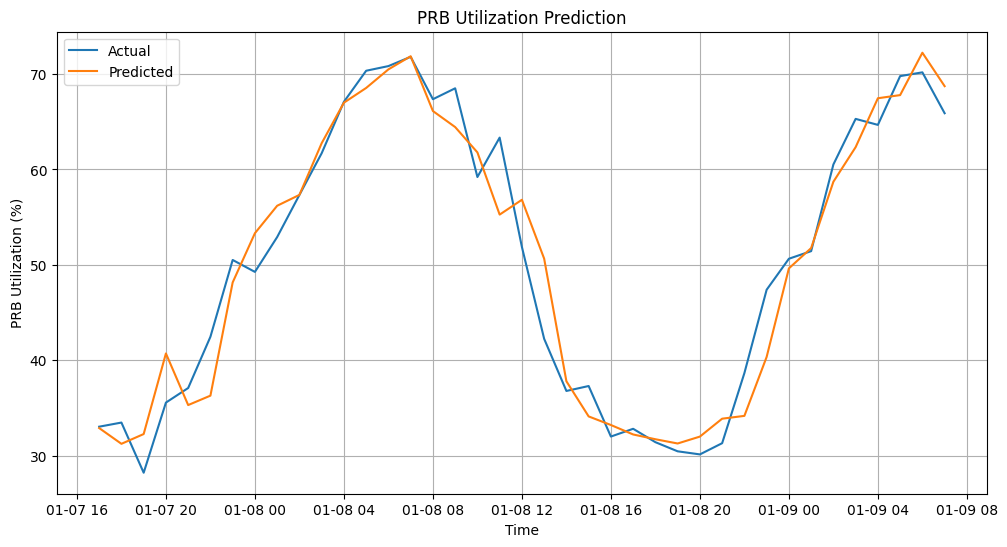

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# --- 1. Simulate PRB utilization time series ---
np.random.seed(42)

time_index = pd.date_range("2023-01-01", periods=200, freq="h")

# Simulate daily traffic pattern + noise
hours = np.arange(200)
prb_util = 50 + 20*np.sin(2*np.pi*hours/24) + np.random.normal(0, 3, 200)

data = pd.DataFrame({"PRB_Utilization": prb_util}, index=time_index)

# --- 2. Create lag features (previous hours) ---
for lag in range(1, 6):
    data[f"lag_{lag}"] = data["PRB_Utilization"].shift(lag)

data = data.dropna()

# Features and target
X = data.drop("PRB_Utilization", axis=1)
y = data["PRB_Utilization"]

# Train/test split
split = int(len(data) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --- 3. Train model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 4. Predict ---
predictions = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))

# --- 5. Predict next hour (capacity planning idea) ---
last_values = data.iloc[-1][X.columns].values.reshape(1, -1)
next_hour_prediction = model.predict(last_values)[0]

print("Predicted PRB utilization for next hour:", round(next_hour_prediction, 2))

# --- 6. Visualization ---
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Actual")
plt.plot(y_test.index, predictions, label="Predicted")
plt.title("PRB Utilization Prediction")
plt.xlabel("Time")
plt.ylabel("PRB Utilization (%)")
plt.legend()
plt.grid(True)
plt.show()
